## making test plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
# import pandas as pd
import dask
# from mpl_toolkits.basemap import Basemap
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp
%matplotlib inline

In [2]:
from functions import ccplot

In [3]:
import seaborn as sns
# Use seaborn style defaults and set default figure size
# plt.style.use('seaborn-pastel')
# sns.set_theme(style="ticks")
# plt.style.use(['science', 'notebook'])
plt.style.use('tableau-colorblind10')

In [4]:
# Colormap selection
xr.set_options(cmap_divergent='BrBG', cmap_sequential='YlGnBu')

In [5]:
fsize = 15
tsize = 18

tdir = 'in'

major = 5.0
minor = 3.0

# plt.style.use(style)
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
plt.rcParams['axes.linewidth'] = 1.4
plt.rcParams['legend.handlelength'] = 0.5

In [188]:
# making a new colomap -> tmap

n = 35
diff = 0.5
cmap = plt.cm.BrBG
cmap2 = plt.cm.RdBu_r
lower = cmap(np.linspace(0, diff, n))
lower2 = cmap2(np.linspace(0, diff, n))
white = np.ones((5, 4))
white2 = np.ones((5, 4))
upper = cmap(np.linspace(1-diff, 1, n))
upper2 = cmap2(np.linspace(1-diff, 1, n))
colors = np.vstack((lower, white, upper))
colors2 = np.vstack((lower2, white2, upper2))
tmap = m.colors.LinearSegmentedColormap.from_list('map_white', colors)
tmap2 = m.colors.LinearSegmentedColormap.from_list('map_white', colors2)

## Import Data

In [7]:
mfdata_DIR = './data/GPM_lowres_data/gpm_2013.nc'
gpm = xr.open_mfdataset(mfdata_DIR, chunks=dict(time=-1, lat=-1, lon=-1))

In [8]:
precip = gpm.precipCal.resample(time = '24H').sum() / 2

In [9]:
precip = precip.chunk(dict(time = -1, lat = -1, lon=-1))
precip

<xarray.DataArray 'precipCal' (time: 365, lat: 161, lon: 161)>
dask.array<rechunk-merge, shape=(365, 161, 161), dtype=float32, chunksize=(365, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-12-31
  * lon      (lon) float64 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.0 39.25 39.5 39.75 40.0

In [10]:
mfdata_DIR2 = './data/era_data/era_2013.nc'
era = xr.open_dataset(mfdata_DIR2, chunks=dict(time=-1, lat=-1, lon=-1))

In [12]:
# era = era.sel(expver=1, drop=True)
era = era.transpose('time', 'latitude', 'longitude')
# era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})
era = era.rename({'longitude':'lon', 'latitude':'lat'})
era = era.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era

<xarray.Dataset>
Dimensions:  (lon: 161, lat: 161, time: 8760)
Coordinates:
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-12-31T23:00:00
Data variables:
    u10      (time, lat, lon) float32 dask.array<chunksize=(8760, 161, 161), meta=np.ndarray>
    v10      (time, lat, lon) float32 dask.array<chunksize=(8760, 161, 161), meta=np.ndarray>
    d2m      (time, lat, lon) float32 dask.array<chunksize=(8760, 161, 161), meta=np.ndarray>
    t2m      (time, lat, lon) float32 dask.array<chunksize=(8760, 161, 161), meta=np.ndarray>
    mx2t     (time, lat, lon) float32 dask.array<chunksize=(8760, 161, 161), meta=np.ndarray>
    mn2t     (time, lat, lon) float32 dask.array<chunksize=(8760, 161, 161), meta=np.ndarray>
    sst      (time, lat, lon) float32 dask.array<chunksize=(8760, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-09 07:32:57 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [13]:
mfdata_DIR3 = './data/era_pres_data/era_pres_2013*.nc'
era_pres = xr.open_mfdataset(mfdata_DIR3, chunks=dict(time=-1, lat=-1, lon=-1))
# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40), engine='netcdf4', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era_pres = xr.open_mfdataset(mfdata_DIR3, chunks=dict(time=1000, lat=40, lon=40))

In [14]:
era_pres = era_pres.transpose('time', 'level', 'latitude', 'longitude')
# era_pres = era_pres.rename_dims({'longitude':'lon', 'latitude':'lat'})
era_pres = era_pres.rename({'longitude':'lon', 'latitude':'lat'})
era_pres = era_pres.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era_pres

<xarray.Dataset>
Dimensions:  (lon: 161, lat: 161, level: 29, time: 8760)
Coordinates:
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0
  * level    (level) int32 50 70 100 125 150 175 ... 875 900 925 950 975 1000
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-12-31T23:00:00
Data variables:
    q        (time, level, lat, lon) float32 dask.array<chunksize=(720, 29, 161, 161), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(720, 29, 161, 161), meta=np.ndarray>
    w        (time, level, lat, lon) float32 dask.array<chunksize=(720, 29, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-11 11:50:51 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [14]:
mfdata_DIR4 = './data/era_data2/*.nc'
era2 = xr.open_mfdataset(mfdata_DIR4, chunks=dict(time=-1, lat=-1, lon=-1))
# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40), engine='netcdf4', parallel=True)
# era2 = xr.open_mfdataset(mfdata_DIR4, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era2 = xr.open_dataset(mfdata_DIR4, chunks=dict(time=-1, lat=-1, lon=-1))

In [15]:
# era2 = era2.sel(expver=1, drop=True)
era2 = era2.transpose('time', 'latitude', 'longitude')
# era2 = era2.rename_dims({'longitude':'lon', 'latitude':'lat'})
era2 = era2.rename({'longitude':'lon', 'latitude':'lat'})
era2 = era2.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era2

<xarray.Dataset>
Dimensions:  (lon: 161, lat: 161, time: 184800)
Coordinates:
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    e        (time, lat, lon) float32 dask.array<chunksize=(5136, 161, 161), meta=np.ndarray>
    vimd     (time, lat, lon) float32 dask.array<chunksize=(5136, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-04 12:51:49 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [15]:
# t2m = era.t2m.sel(lat = 19, lon = 72).resample(time = '24H').mean()
# d2m = era.d2m.sel(lat = 19, lon = 72).resample(time = '24H').mean()
# vimd = (era2.vimd).sel(lat = 19, lon = 72).resample(time = '24H').mean()
# evap = (era2.e).sel(lat = 19, lon = 72).resample(time = '24H').mean()
# # u = (era.u10).resample(time = '24H').mean()
# # v = (era.v10).resample(time = '24H').mean()
pres = era_pres.coords['level'],
temp = era_pres.t.resample(time = '24H').mean()
omega = era_pres.w.resample(time = '24H').mean()
q = era_pres.q.resample(time = '24H').mean()

In [16]:
# ds_comb = xr.merge([precip.sel(lat=19, lon=72), t2m, d2m, vimd, evap])
# ds_comb2 = xr.merge([temp, q, omega])
ds_comb = xr.merge([precip])
ds_comb2 = xr.merge([temp, q, omega])

In [19]:
ds_comb2

,Array,Chunk
Bytes,1.02 GiB,2.87 MiB
Shape,"(365, 29, 161, 161)","(1, 29, 161, 161)"
Count,1517 Tasks,365 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,1.02 GiB,2.87 MiB
Shape,"(365, 29, 161, 161)","(1, 29, 161, 161)"
Count,1517 Tasks,365 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [20]:
mon = [6,7,8,9]
premon = [3,4,5]
postmon = [10,11,12]
wint = [1,2]

In [21]:
ds_comb_mon = xr.concat([list(ds_comb.groupby('time.month'))[i-1][1] for i in mon], dim='time')
ds_comb_mon2 = xr.concat([list(ds_comb2.groupby('time.month'))[i-1][1] for i in mon], dim='time')

In [22]:
ds_comb_mon = ds_comb_mon.chunk(dict(time = -1)).sortby('time.year')
ds_comb_mon2 = ds_comb_mon2.chunk(dict(time = -1)).sortby('time.year')

In [25]:
ds_comb_mon2

<xarray.Dataset>
Dimensions:  (time: 122, lon: 161, lat: 161, level: 29)
Coordinates:
  * time     (time) datetime64[ns] 2013-06-01 2013-06-02 ... 2013-09-30
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0
  * level    (level) int32 50 70 100 125 150 175 ... 875 900 925 950 975 1000
Data variables:
    t        (time, level, lat, lon) float32 dask.array<chunksize=(122, 29, 161, 161), meta=np.ndarray>
    q        (time, level, lat, lon) float32 dask.array<chunksize=(122, 29, 161, 161), meta=np.ndarray>
    w        (time, level, lat, lon) float32 dask.array<chunksize=(122, 29, 161, 161), meta=np.ndarray>

In [26]:
ds_comb_mon_loaded = ds_comb_mon.load()
ds_comb_mon2_loaded = ds_comb_mon2.load()

In [131]:
ds_comb_mon2_loaded = ds_comb_mon2_loaded.reindex(lat=ds_comb_mon2_loaded.lat[::-1])

In [132]:
ds_comb_mon2_loaded

<xarray.Dataset>
Dimensions:  (lat: 161, time: 122, lon: 161, level: 29)
Coordinates:
  * lat      (lat) float32 0.0 0.25 0.5 0.75 1.0 ... 39.0 39.25 39.5 39.75 40.0
  * time     (time) datetime64[ns] 2013-06-01 2013-06-02 ... 2013-09-30
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * level    (level) int32 50 70 100 125 150 175 ... 875 900 925 950 975 1000
Data variables:
    t        (time, level, lat, lon) float32 212.0 212.0 212.0 ... 300.0 299.9
    q        (time, level, lat, lon) float32 1.984e-06 1.984e-06 ... 0.00282
    w        (time, level, lat, lon) float32 0.0004274 0.0006919 ... -0.04083

In [133]:
# using_ds1 = ds_comb_mon_loaded.sel(time = "2010-08-29")

In [134]:
# using_ds2 = ds_comb_mon2_loaded.sel(time = "2010-08-29")

In [135]:
precip = ds_comb_mon_loaded.precipCal
# t2m = ds_comb_mon_loaded.t2m
# d2m = ds_comb_mon_loaded.d2m
# vimc = -ds_comb_mon_loaded.vimd
# evap = ds_comb_mon_loaded.e

temp = ds_comb_mon2_loaded.t
q = ds_comb_mon2_loaded.q
omega = ds_comb_mon2_loaded.w

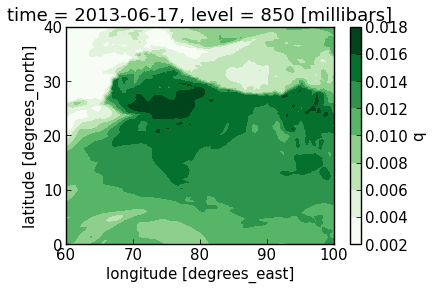

In [143]:
q.sel(level = 850, time = '2013-06-17 00:00:00').plot.contourf(cmap = 'Greens', levels=9)

In [68]:
from scipy import integrate

In [252]:
from time import sleep

In [58]:
def get_events_precip(p95, preciparr):
    idxs = np.where(preciparr >= p95)
    events = preciparr[idxs]
    return events, idxs

# util function to calculate value of qs
def get_qs(temp, pres):
    a1 = 6.1114
    temp0 = 273.16
    a3w = 17.269
    a4w = 35.86
    a3i = 21.875
    a4i = 7.66

    # calculating saturation vapor pressure using temperature values
    if temp > temp0:
        a3 = a3w
        a4 = a4w
        es = a1 * np.exp(a3 * ((temp - temp0)/(temp - a4)))
    elif temp < temp0 - 23:
        a3 = a3i
        a4 = a4i
        es = a1 * np.exp(a3 * ((temp - temp0)/(temp - a4)))
    else:
        esw = a1 * np.exp(a3w * ((temp - temp0)/(temp - a4w)))
        esi = a1 * np.exp(a3i * ((temp - temp0)/(temp - a4i)))
        es = esi + ((esw - esi)*(((temp - (temp0 - 23))/23)**2))

    # get saturation specific humidity value
    epsilon = 0.622
    qs = (epsilon * es) / (pres - ((1 - epsilon)*es))
    return qs

def calc_qs(temp, pres):
    pres_range = len(pres)
    time_range = len(temp)
    qs = np.empty((time_range, pres_range))
    for i in range(time_range):
        for j in range(pres_range):
            qs[i, j] = get_qs(temp[i, j], pres[j])
    return qs

# vert integral function (Simpson's method)
def vert_integ(x, y):
    int = integrate.simpson(y, x, even='avg')

    return int

# finite differnce methods to find derivative
def centered_diff(arr):
    arr_diff = np.empty(len(arr) - 2)
    for i in range((len(arr) - 2)):
        arr_diff[i] = arr[i+2] - arr[i]
    return arr_diff

def forward_diff(arr):
    arr_diff = np.diff(arr)
    return arr_diff

def backward_diff(arr):
    arr_diff = -(np.diff(arr[::-1])[::-1])
    return arr_diff

def get_pe1(omega, pres, qs):
    p_cdiff = centered_diff(pres)
    p_fdiff = forward_diff(pres)
    p_bdiff = backward_diff(pres)

    time_range = len(omega)
    pe = np.empty(time_range)
    thermo = np.empty(time_range)

    # taking mean omega of all extremes to get the thermodynamic contribution
    omega_mean = np.nanmean(omega)

    for i in range(time_range):
        qs_cdiff = centered_diff(qs[i])/(p_cdiff)
        qs_fdiff = forward_diff(qs[i])/(p_fdiff)
        qs_bdiff = backward_diff(qs[i])/(p_bdiff)

        qs_diff = np.insert(qs_cdiff, 0, qs_fdiff[0])
        qs_diff = np.append(qs_diff, qs_bdiff[-1])

        # TODO VARY: the value of 3600 will change for different time calculations
        # 1 hour -> 3600s
        # 3 hour -> 3600*3 and so on
        # '+' sign as pressure is from surface-to-top and not top-to-surface
        pe[i] = (-1/(9.806)) * vert_integ(pres, omega[i]*qs_diff) * 3600
        thermo[i] = (-1/(9.806)) * vert_integ(pres, omega_mean*qs_diff) * 3600

    dyn = pe - thermo
    return pe, dyn, thermo

In [232]:
from tqdm.notebook import tqdm

In [392]:
def get_mean_freq(precip, pres, temp_levels, q, omega):
    print("Starting the scaling process ...")

    print("Initializing zero arrays ...")

    xrange = len(precip[0])
    yrange = len(precip[0][0])

    # initialising the for loop by making zeros array for t2m and d2m to mutate
    precip95 = np.empty((xrange, yrange))
    precip_mean = np.empty((xrange, yrange))
    # t2m_mean = np.empty((xrange, yrange))
    # d2m_mean = np.empty((xrange, yrange))
    # vimd_mean = np.empty((xrange, yrange))
    pe_mean = np.empty((xrange, yrange))
    dyn_mean = np.empty((xrange, yrange))
    thermo_mean = np.empty((xrange,yrange))
    frequency = np.empty((xrange, yrange))

    print("Starting the loop ...")

    # starting loop
    for lat in tqdm(range(xrange)):
        for lon in tqdm(range(yrange), leave=False):

            # redefine for convenience
            preciparr = precip.isel(lat = lat, lon = lon)
            # t2marr = t2m.isel(lat = lat, lon = lon)
            # d2marr = d2m.isel(lat = lat, lon = lon)
            temparr = temp_levels.isel(lat = lat, lon = lon)
            qarr = q.isel(lat = lat, lon = lon)
            # vimdarr = vimd.isel(lat = lat, lon = lon)
            omegaarr = omega.isel(lat = lat, lon = lon)

            # start
            p95 = preciparr[~np.isnan(preciparr)].quantile(0.95, interpolation='higher')
            precip_events, precip_idxs = get_events_precip(p95, preciparr[~np.isnan(preciparr)])
            no_of_events = len(precip_events)
            precip_events_mean = np.mean(precip_events)
            # t2m_events = t2marr[precip_idxs]
            # t2m_events_mean = np.mean(t2m_events)
            # d2m_events = d2marr[precip_idxs]
            # d2m_events_mean = np.mean(d2m_events)
            temp_events = temparr[precip_idxs]
            q_events = qarr[precip_idxs]
            # vimd_events = vimdarr[precip_idxs]
            # vimd_events_mean = np.mean(vimd_mean)
            omega_events = omegaarr[precip_idxs]

            # get the values of qs
            qs_events  = calc_qs(temp_events, pres)

            # get the value of precipitation estimate
            pe_events, dyn_events, thermo_events = get_pe1(omega_events, pres, qs_events)
            pe_events_mean = np.mean(pe_events)
            dyn_events_mean = np.mean(dyn_events)
            thermo_events_mean = np.mean(thermo_events)

            #### OUTPUT results

            # make 2-D arrays
            precip95[lat, lon] = p95
            precip_mean[lat, lon] = precip_events_mean
            frequency[lat, lon] = no_of_events
            # t2m_mean[lat, lon] = t2m_events_mean
            # d2m_mean[lat, lon] = d2m_events_mean
            # vimd_mean[lat, lon] = vimd_events_mean
            pe_mean[lat, lon] = pe_events_mean
            dyn_mean[lat, lon] = dyn_events_mean
            thermo_mean[lat, lon] = thermo_events_mean

            # print(f"Completed {lat+1}/{xrange} lat and {lon+1}/{yrange} lon", end='\r')
            sleep(0.01)

    # return all the values as  dictionary
    res = {
            # general values and scaling
            "precip_95" : precip95, # 95th percentile precipitation obtaied from new scaling method
            "precip_mean" : precip_mean, # mean of all extreme events at all grid points
            "frequency" : frequency, # no.of events
            # "t2m_mean" : t2m_mean, # mean of all vimd associated with extremes at all grid points
            # "d2m_mean" : d2m_mean, # mean of all vimd associated with extremes at all grid points
            # "vimd_mean" : vimd_mean, # mean of all vimd associated with extremes at all grid points
            "pe_mean" : pe_mean, # mean of all precipitation estimates obtained using METHOD-1
            "dyn_mean" : dyn_mean, # mean of all dyn estimates obtained using METHOD-1
            "thermo_mean" : thermo_mean, # mean of all thermo estimates obtained using METHOD-1
            }

    return res

In [378]:
precip1 = precip.where(precip > 0.1)

In [270]:
pres = ds_comb_mon2_loaded.coords['level'].to_numpy()
pres

array([  50,   70,  100,  125,  150,  175,  200,  225,  250,  300,  350,
        400,  450,  500,  550,  600,  650,  700,  750,  775,  800,  825,
        850,  875,  900,  925,  950,  975, 1000], dtype=int32)

In [393]:
res = get_mean_freq(precip1.sel(lat = slice(17, 21), lon = slice(70,74)), pres, temp.sel(lat = slice(17, 21), lon = slice(70,74)), q.sel(lat = slice(17, 21), lon = slice(70,74)), omega.sel(lat = slice(17, 21), lon = slice(70,74)))

Starting the scaling process ...
Initializing zero arrays ...
Starting the loop ...


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

In [171]:
from matplotlib.colors import BoundaryNorm as BM

In [394]:
precip95 = res['precip_95']
precip_true = res['precip_mean']
freq = res['frequency']
precip_estimate = res['pe_mean'] * 24
dyn_comp = res['dyn_mean'] * 24
thermo_comp = res['thermo_mean'] * 24

In [395]:
x, y = np.meshgrid(precip.sel(lat = slice(17, 21), lon = slice(70,74)).coords['lon'], precip.sel(lat = slice(17, 21), lon = slice(70,74)).coords['lat'])

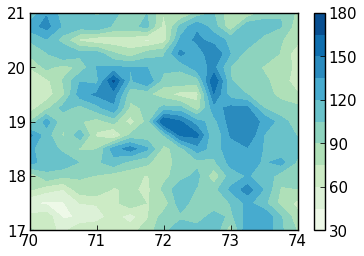

In [396]:
cf = plt.contourf(x, y, np.abs(precip_true), cmap = 'GnBu', levels=9)
plt.colorbar(cf)

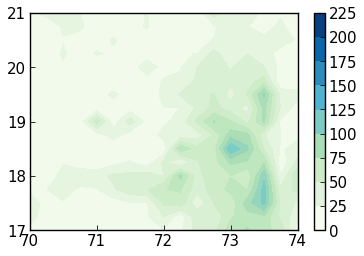

In [397]:
fig, ax = plt.subplots()
cf = ax.contourf(x, y, np.abs(precip_estimate), cmap = 'GnBu', levels=9, vmin=0, vmax = 225)
norm = BM(np.arange(0, 250,25), 256, extend='neither')
fig.colorbar(m.cm.ScalarMappable(norm = norm, cmap='GnBu'), ax = ax, \
            orientation = 'vertical')

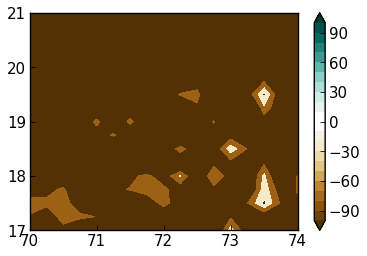

In [398]:
fig, ax = plt.subplots()
cf = plt.contourf(x, y, (np.abs(precip_estimate) - np.abs(precip_true)), cmap = tmap, levels=9, vmin=-40, vmax=40, extend='both')
norm = BM(np.arange(-100, 110, 10), 256, extend='both')
fig.colorbar(m.cm.ScalarMappable(norm = norm, cmap=tmap), ax = ax, \
            orientation = 'vertical')

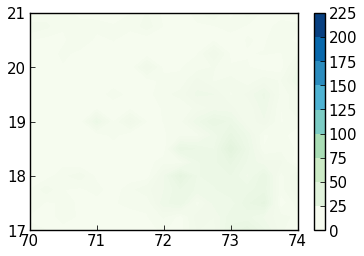

In [399]:
fig, ax = plt.subplots()
cf = ax.contourf(x, y, np.abs(dyn_comp), cmap = 'GnBu', levels=9, vmin=0, vmax = 225)
norm = BM(np.arange(0, 250,25), 256, extend='neither')
fig.colorbar(m.cm.ScalarMappable(norm = norm, cmap='GnBu'), ax = ax, \
            orientation = 'vertical')

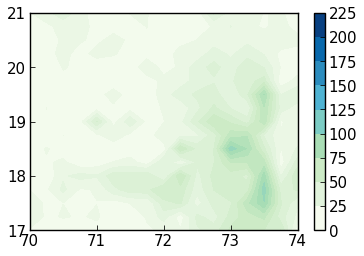

In [400]:
fig, ax = plt.subplots()
cf = ax.contourf(x, y, np.abs(thermo_comp), cmap = 'GnBu', levels=9, vmin=0, vmax = 225)
norm = BM(np.arange(0, 250,25), 256, extend='neither')
fig.colorbar(m.cm.ScalarMappable(norm = norm, cmap='GnBu'), ax = ax, \
            orientation = 'vertical')

## Single lat,lon

In [31]:
def get_qs(temp, pres):
    """
    Elemental Function to determine the precipitation estimate for each value of tempreature and omega at each grid point. (func to be used in starmap multithreading)
    ------------------
    Input :
        temp : temperature value at a grid point.
        omega_da : vertical velocity value at a grid point
    Output :
        qs : qs value at that grid point
    ------------------
    """
    a1 = 6.1114
    temp0 = 273.16
    a3w = 17.269
    a4w = 35.86
    a3i = 21.875
    a4i = 7.66

    # calculating saturation vapor pressure using temperature values
    if temp > temp0:
        a3 = a3w
        a4 = a4w
        es = a1 * np.exp(a3 * ((temp - temp0)/(temp - a4)))
    elif temp < temp0 - 23:
        a3 = a3i
        a4 = a4i
        es = a1 * np.exp(a3 * ((temp - temp0)/(temp - a4)))
    else:
        esw = a1 * np.exp(a3w * ((temp - temp0)/(temp - a4w)))
        esi = a1 * np.exp(a3i * ((temp - temp0)/(temp - a4i)))
        es = esi + ((esw - esi)*(((temp - (temp0 - 23))/23)**2))

    # get saturation specific humidity value
    epsilon = 0.622
    qs = (epsilon * es) / (pres - ((1 - epsilon)*es))
    return qs

In [32]:
def calc_qs(temp, pres):
    pres_range = len(pres)
    time_range = len(temp)
    qs = np.empty((time_range, pres_range))
    for i in range(time_range):
        for j in range(pres_range):
            qs[i, j] = get_qs(temp[i, j], pres[j])
        print(f"Completed time {i+1}/{time_range}", end='\r')
    return qs

In [33]:
# qs = calc_qs(t1.sel(lat=19, lon=72), pres)
qs = calc_qs(temp, pres[0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [68]:
np.shape(qs)

(122, 29)

In [69]:
from scipy import integrate

In [70]:
# vert integral function (Simpson's method)
def vert_integ(x, y):
    int = integrate.simpson(y, x, even='avg')

    return int

# finite differnce methods to find derivative
def centered_diff(arr):
    arr_diff = np.empty(len(arr) - 2)
    for i in range((len(arr) - 2)):
        arr_diff[i] = arr[i+2] - arr[i]
    return arr_diff

def forward_diff(arr):
    arr_diff = np.diff(arr)
    return arr_diff

def backward_diff(arr):
    arr_diff = -(np.diff(arr[::-1])[::-1])
    return arr_diff

In [108]:
p_cdiff = centered_diff(pres[0])
p_fdiff = forward_diff(pres[0])
p_bdiff = backward_diff(pres[0])

pe = np.empty((len(qs)))
pw = np.empty((len(qs)))

for i in range(len(qs)):
    #
    qs_cdiff = centered_diff(qs[i])/(p_cdiff)
    qs_fdiff = forward_diff(qs[i])/(p_fdiff)
    qs_bdiff = backward_diff(qs[i])/(p_bdiff)
    #
    qs_diff = np.insert(qs_cdiff, 0, qs_fdiff[0])
    qs_diff = np.append(qs_diff, qs_bdiff[-1])
    # p_diff = np.insert(p_cdiff, 0, p_fdiff[0])
    # p_diff = np.append(p_diff, p_bdiff[-1])

    pe[i] = (-1/(9.806)) * vert_integ(pres[0], omega[i]*qs_diff) * 3600 * 24
    pw[i] = (1/(1000*9.806)) * vert_integ(pres[0], q[i]) * 3600 * 24

# p_cdiff = centered_diff(pres[0])
# p_fdiff = forward_diff(pres[0])
# p_bdiff = backward_diff(pres[0])
# #
# pe = np.empty(len(temporary_precip_indx))
# i = 0
# for t in temporary_precip_indx:
#     qs_cdiff = centered_diff(qs[t])/(p_cdiff)
#     qs_fdiff = forward_diff(qs[t])/(p_fdiff)
#     qs_bdiff = backward_diff(qs[t])/(p_bdiff)

#     qs_diff = np.insert(qs_cdiff, 0, qs_fdiff[0])
#     qs_diff = np.append(qs_diff, qs_bdiff[-1])
#     # p_diff = np.insert(p_cdiff, 0, p_fdiff[0])
#     # p_diff = np.append(p_diff, p_bdiff[-1])

#     pe[i] = (-100/9.806) * vert_integ(pres[0], (w1[t]*qs_diff))
#     i = i +1
# print("Done")

In [130]:
p_climate = precip.group

In [132]:
p_climate

16.897457

In [109]:
import pandas as pd

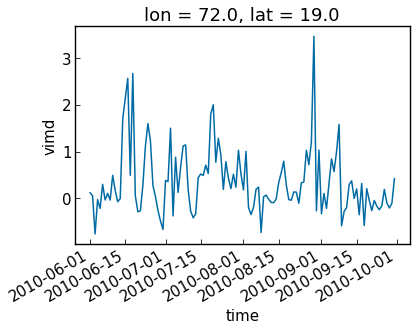

In [128]:
vimc.plot()

(array([14761., 14775., 14791., 14805., 14822., 14836., 14853., 14867.,
        14883.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

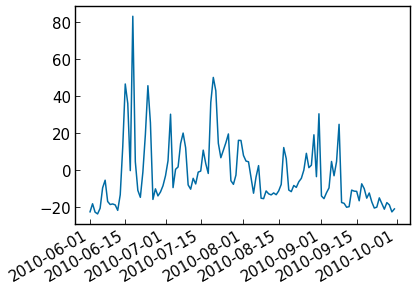

In [133]:
plt.plot(pd.date_range("2010-06-01", "2010-09-30", freq='1D'), pe-p_climate)
plt.xticks(rotation=30, ha='right')

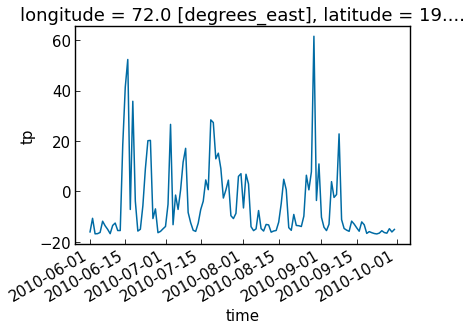

In [134]:
(era_precip.tp*1000 - p_climate).plot()

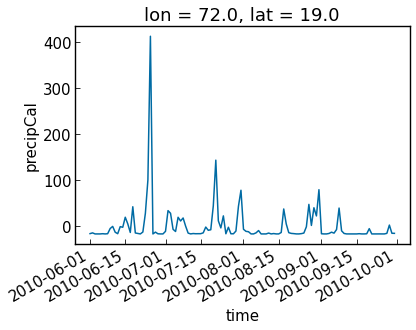

In [135]:
(precip - p_climate).plot()

(array([14761., 14775., 14791., 14805., 14822., 14836., 14853., 14867.,
        14883.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

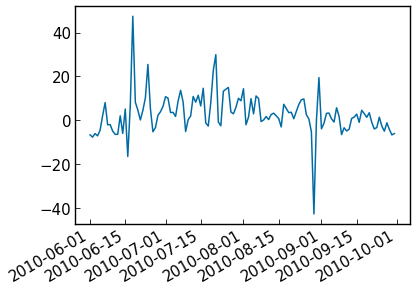

In [123]:
plt.plot(pd.date_range("2010-06-01", "2010-09-30", freq='1D'), pe-(era_precip.tp*1000))
plt.xticks(rotation=30, ha='right')

(array([14761., 14775., 14791., 14805., 14822., 14836., 14853., 14867.,
        14883.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

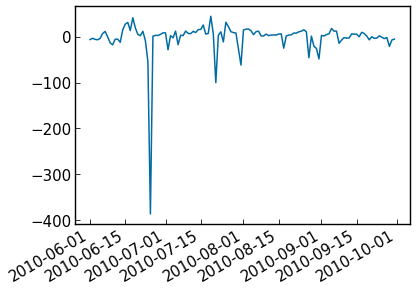

In [118]:
plt.plot(pd.date_range("2010-06-01", "2010-09-30", freq='1D'), pe-precip)
plt.xticks(rotation=30, ha='right')

In [81]:
era_precip = xr.open_dataset('/home/nkv/Downloads/era_precip.nc')
era_precip

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 161, time: 2928)
Coordinates:
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2010-06-01 ... 2010-09-30T23:00:00
Data variables:
    mcpr       (time, latitude, longitude) float32 ...
    mlspr      (time, latitude, longitude) float32 ...
    mtpr       (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-25 13:19:23 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [82]:
era_precip = era_precip.sel(latitude = 19, longitude = 72)

In [83]:
era_precip = era_precip.resample(time = '24H').sum()

In [4]:
gpm_daily = xr.open_mfdataset('/home/nkv/Documents/aditya/gpm_2010_daily/*.nc4')

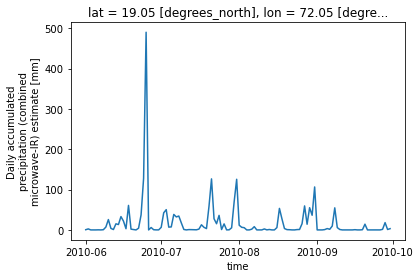

In [8]:
gpm_daily.precipitationCal.sel(lat = 19.05, lon = 72.05).plot()

## testing quantreg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import QuantileRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [2]:
rng = np.random.RandomState(42)

In [3]:
x = np.linspace(0, 10, 2000)
X = x[:, np.newaxis]

In [4]:
X.shape

(2000, 1)

In [5]:
y_true_mean = 10 + 0.5 * x

In [6]:
y_normal = y_true_mean + rng.normal(loc=0, scale=0.5 + 0.5 * x, size=x.shape[0])

In [7]:
a = 5
y_pareto = y_true_mean + 10 * (rng.pareto(a, size=x.shape[0]) - 1 / (a - 1))

In [8]:
y_pareto.shape

(2000,)

In [9]:
qr = QuantileRegressor(quantile=0.99, alpha=0)

In [10]:
qr5 = QuantileRegressor(quantile=0.50, alpha=0)

In [11]:
y_pred = qr.fit(X, y_normal).predict(X)

In [21]:
y_pred5 = qr5.fit(X, y_normal).predict(X)

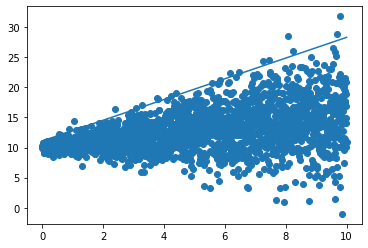

In [12]:
plt.plot(x, y_pred)
# plt.plot(x, y_pred5)
plt.scatter(x, y_normal)